# Basic Image processing

In [6]:
# loading libraries 
import numpy as np
import cv2 
import matplotlib.pyplot as plt

# setting size of the plot 
plt.rcParams['figure.figsize'] = (12, 8)

(-0.5, 1279.5, 719.5, -0.5)

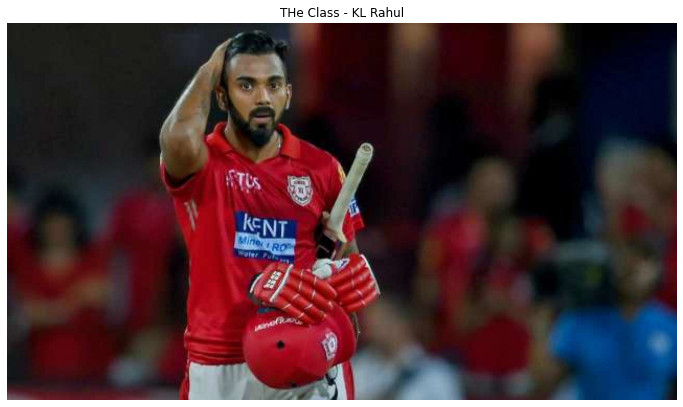

In [8]:
# loading the image  
img = cv2.imread('data/kl_rahul.jpg')

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # since it is read as BGR, converting to RGB
plt.imshow(img_rgb)
plt.title('THe Class - KL Rahul' )
plt.axis('off')

In [9]:
def plot_2_images(image1,image2,label1,label2):
    fig,ax = plt.subplots(1,2)
    ax[0].imshow(image1)
    ax[1].imshow(image2)
    ax[0].axis('off')
    ax[1].axis('off')
    ax[0].set_title(label1)
    ax[1].set_title(label2)

In [11]:
def shift_hsv_img(img,channel,change):
    temp = np.copy(img)
    if change > 0:
        temp[:,:,channel] = temp[:,:,channel] + temp[:,:,channel]*change
    else:
        temp[:,:,channel] =temp[:,:,channel] -  temp[:,:,channel]*np.abs(change)
    
    if channel == 0:
        temp = np.clip(temp,0,179)
    else:
        temp = np.clip(temp,0,255)
        
    return cv2.cvtColor(temp,cv2.COLOR_HSV2RGB)

# Brightness

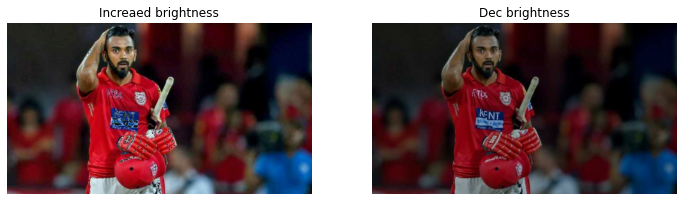

In [14]:
# for changing brightness, we will use HSV instead of RGB 
img_hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)

# change the values of the third channel - Value. 
bright_inc = shift_hsv_img(img_hsv,2,0.2) # increase by 20%
bright_dec = shift_hsv_img(img_hsv,2,-0.2) # decrease by 20%

plot_2_images(bright_inc,bright_dec,'Increaed brightness','Dec brightness')

# Histogram equalization

(-0.5, 1279.5, 719.5, -0.5)

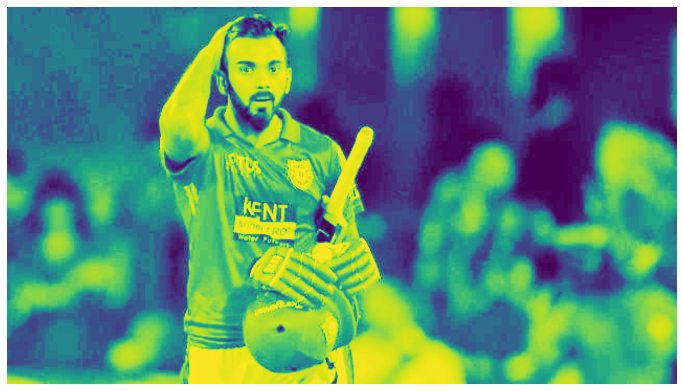

In [17]:
img_grey = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
hist_eq = cv2.equalizeHist(img_grey)

plt.imshow(hist_eq)
plt.axis('off')

# Image Blur

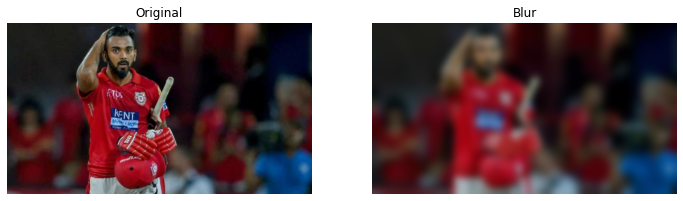

In [22]:
blur = cv2.GaussianBlur(img_rgb,(101,101),0)

plot_2_images(img_rgb,blur,'Original','Blur')

# Edge Detection

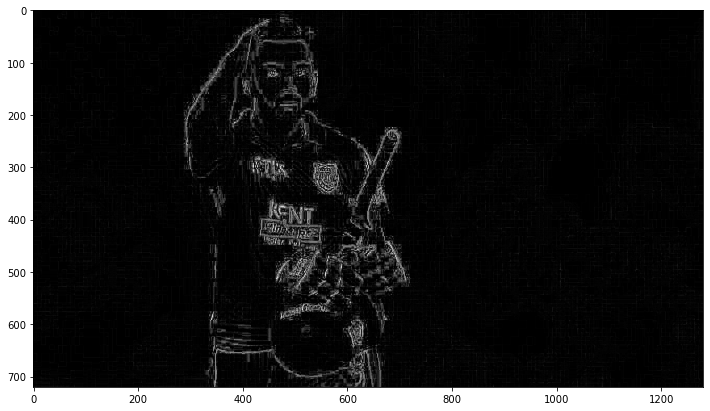

In [72]:
kernel_edge = np.array([[0,-4,0], 
                       [-4, 16,-4],
                       [0,-4,0]])
sharpened = cv2.filter2D(img_grey, -1, kernel_edge)

plt.imshow(sharpened,cmap = 'gray')

using Canny

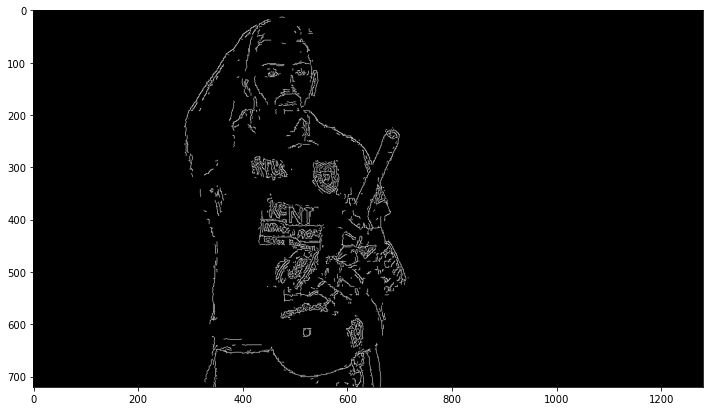

In [67]:
edge_detection2 = cv2.Canny(img_rgb,150,200)

plt.imshow(edge_detection2,cmap = 'gray')